<a href="https://colab.research.google.com/github/hrtywhy/Machine-Learning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library dan Modul

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = read_csv('../content/drive/My Drive/Colab Notebooks/confirmed_acc.csv').iloc[39:]
df = df.reset_index()

last_date = to_datetime(df['date'].iloc[-1], format='%m/%d/%Y')
data = [
            ['4/11/2020', 3842],
            ['4/12/2020', 4241],
            ['4/13/2020', 4557],
            ['4/14/2020', 4839],
            ['4/15/2020', 5136],
            ['4/16/2020', 5527],
            ['4/17/2020', 5923],
            ['4/18/2020', 6248],
            ['4/19/2020', 6575],
            ['4/20/2020', 6760],
            ['4/21/2020', 7135],
            ['4/22/2020', 7418],
            ['4/23/2020', 7775],
            ['4/24/2020', 8211],
            ['4/25/2020', 8607],
            ['4/26/2020', 8882],
            ['4/27/2020', 9096],
            ['4/28/2020', 9511],
            ['4/29/2020', 9971]
        ]

for k,v in data:
    if datetime.strptime(k, "%m/%d/%Y") > last_date:
        df = df.append({'date' : k, 'cases' : v} ,ignore_index=True)

last_date = to_datetime(df['date'].iloc[-1], format='%m/%d/%Y')

In [6]:
df['index'] = df.index

df.columns = ['indeks', 'tanggal', 'kasus']
df

,indeks,tanggal,kasus
0,0,3/1/2020,0
1,1,3/2/2020,2
2,2,3/3/2020,2
3,3,3/4/2020,2
4,4,3/5/2020,2
5,5,3/6/2020,4
6,6,3/7/2020,4
7,7,3/8/2020,6
8,8,3/9/2020,19
9,9,3/10/2020,27


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   indeks   60 non-null     int64 
 1   tanggal  60 non-null     object
 2   kasus    60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


# Visualisai Data

## Distribusi usia orang dengan penyakit yang dikonfirmasi

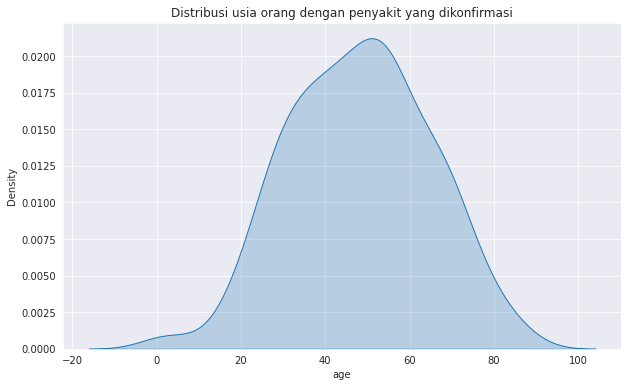

In [12]:
patient = pd.read_csv("../content/drive/My Drive/Colab Notebooks/patient.csv")
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Distribusi usia orang dengan penyakit yang dikonfirmasi")
sns.kdeplot(data=patient['age'], shade=True)

In [13]:
patient.head()

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


In [14]:
cases = pd.read_csv("../content/drive/My Drive/Colab Notebooks/cases.csv")
cases.tail()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
25,27-Mar-20,1439.0,5775,153,1046,4729,0,913,11,46,9,87,18.11%,81.89%,8.32%,4.40%,10.63%
26,28-Mar-20,491.0,6266,109,1155,5111,0,994,13,59,15,102,18.43%,81.57%,8.83%,5.11%,22.20%
27,29-Mar-20,268.0,6534,130,1285,5249,0,1107,5,64,12,114,19.67%,80.33%,8.87%,4.98%,48.51%
28,30-Mar-20,129.0,6663,129,1414,5249,0,1217,11,75,8,122,21.22%,78.78%,8.63%,5.30%,100.00%
29,31-Mar-20,114.0,6777,114,1528,5249,0,1311,6,81,14,136,22.55%,77.45%,8.90%,5.30%,100.00%


## Distribusi status berdasarkan usia dan jenis kelamin

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


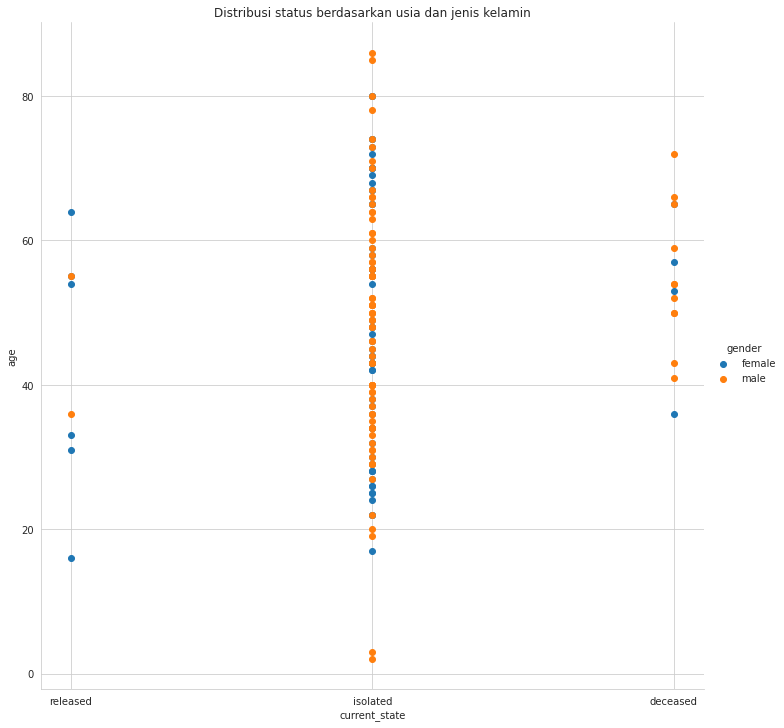

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(patient, hue='gender', size = 10)\
.map(plt.scatter, 'current_state', 'age')\
.add_legend()
plt.title('Distribusi status berdasarkan usia dan jenis kelamin')
plt.show()

## Jumlah pasien di setiap provinsi

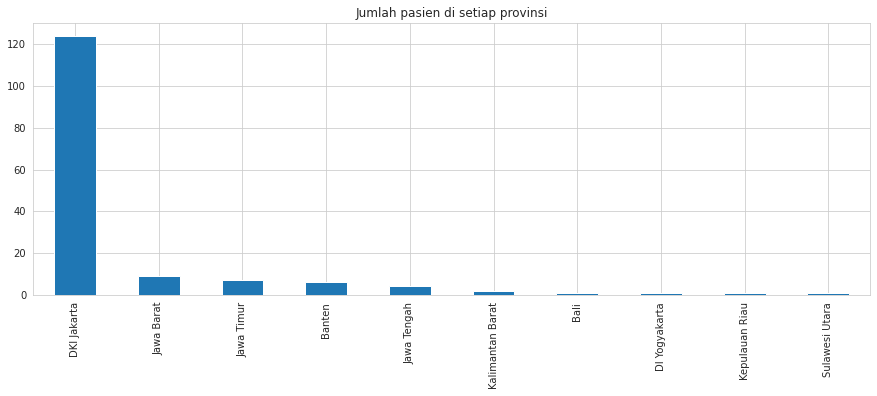

In [16]:
plt.figure(figsize=(15,5))
plt.title('Jumlah pasien di setiap provinsi')
patient.province.value_counts().plot.bar();

In [17]:
import plotly.express as px
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

fig = px.pie( values=patient.groupby(['province']).size().values,names=patient.groupby(['province']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

## Jumlah Pasien di Setiap Rumah Sakit

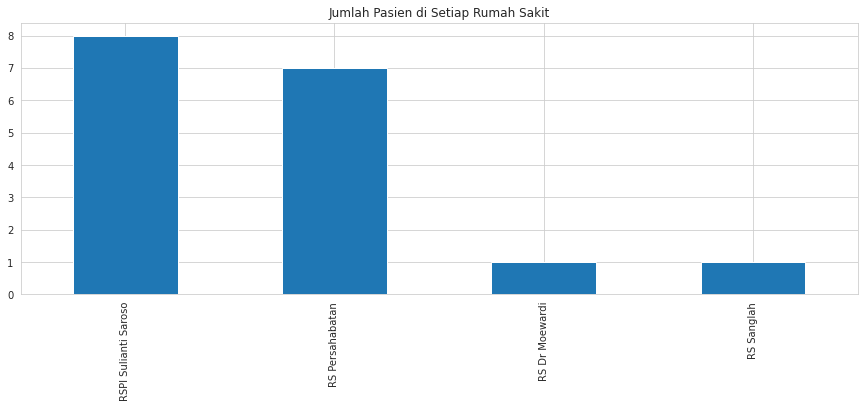

In [18]:
plt.figure(figsize=(15,5))
plt.title('Jumlah Pasien di Setiap Rumah Sakit')
patient.hospital.value_counts().plot.bar();

# Polinomial Regresi

In [20]:
degree = 2

x = df['indeks'].values.reshape(df['indeks'].size,1)
y = df['kasus'].values.reshape(df['kasus'].size,1)
polynomial_features= PolynomialFeatures(degree=degree)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)


In [22]:
def forecast_days_after(n_days_after):
    # Mengembalikan prediksi model regresi polinomial
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return '{:d}'.format(int(round(model_pred[0][0])))

start_date = to_datetime(df['tanggal'].iloc[0], format='%m/%d/%Y')
last_date = to_datetime(df['tanggal'].iloc[-1], format='%m/%d/%Y')

def display_forecast_days_after(n_days_after):
    # Mengembalikan prediksi model regresi polinomial
    end_date = start_date + timedelta(days=n_days_after)
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return end_date.strftime("%d %B %Y"), '{:d}'.format(int(round(model_pred[0][0])))

def days_passed_timedelta():
    # Mengembalikan hasil dari objek timedelta
    # berapa hari telah berlalu sejak tanggal mulai (start_date)
    last_date = to_datetime(df['tanggal'].iloc[-1], format='%m/%d/%Y')
    return last_date.date() - start_date.date() 

def date_days_after(n_days_after, date_format="%d %B %Y", **kwargs):
    tanggal = start_date + timedelta(days=n_days_after)
    return tanggal.date().strftime(date_format)

def display_tabel_prediksi(days_after):
    # tabel prediksi
    days_passed = days_passed_timedelta().days
    tabel_prediksi = PrettyTable(['ke-', 'tanggal','prediksi'])
    for x in range(days_passed+1,days_after+1):
        tabel_prediksi.add_row([x, date_days_after(x, date_format="%d-%m-%Y"), forecast_days_after(x)])
    print(tabel_prediksi)
    
def display_tabel_realisasi(lookback):
    # tabel prediksi
    days_passed = days_passed_timedelta().days
    tabel_realisasi = PrettyTable(['tanggal','pred', 'real', 'p-r'])
    for x in range(days_passed, days_passed-lookback+1, -1):
        pred_ = int(forecast_days_after(x))
        real_ = y[x][0]
        eval_ = pred_ - real_    
        tabel_realisasi.add_row([date_days_after(x, date_format="%d-%m-%Y"), pred_, real_, eval_])
    print(tabel_realisasi)
    
def display_equation(model):
    for coef in model.coef_:
        pass
    streq = "$y = " +str(model.intercept_[0])
    for i,c in enumerate(coef):
        j = len(coef)-i-1
        if abs(c) > c:
            sign = "-"
        else:
            sign = "+"
        if i > 1:
            streq += sign +str(abs(c)) + " \cdot x^{"+str(i)+"}"
        elif i == 1:
            streq += sign +str(abs(c)) + " \cdot x"

    streq =   streq + "$"
    return md(streq)

def display_widget_forecast_days_after():
    print('data hari terakhir-' + str(days_passed_timedelta().days) + \
          ', Gerakkan penggeser ke kanan untuk memajukan prediksi (gunakan tombol panah kanan -> pada keyboard):')
    @interact(x=(days_passed_timedelta().days+1, 365,1))
    def h(x=days_passed_timedelta().days+1):
        tabel_prediksi = PrettyTable(['hari ke-x', 'tanggal','prediksi akumulasi'])
        tabel_prediksi.add_row([x, date_days_after(x), forecast_days_after(x)])
        print(tabel_prediksi)

In [23]:
tabel_parameter = PrettyTable(['parameter', 'nilai'])
tabel_parameter.add_row(['polynomial\ndegree', degree])
tabel_parameter.add_row(['RMSE','{:.10}'.format(rmse)])
tabel_parameter.add_row(['R^2', '{:.10}'.format(r2)])

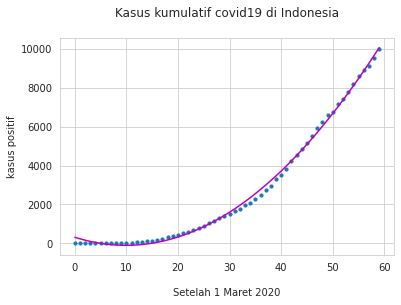

+------------+--------------+
| parameter  |    nilai     |
+------------+--------------+
| polynomial |      2       |
|   degree   |              |
|    RMSE    | 144.2767888  |
|    R^2     | 0.9978007711 |
+------------+--------------+


$y = 317.39233209942586-83.4590682246738 \cdot x+4.211779103143527 \cdot x^{2}$

In [24]:
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.title('Kasus kumulatif covid19 di Indonesia\n')
plt.xlabel('\nSetelah 1 Maret 2020')
plt.ylabel('kasus positif')

plt.plot(x, y_poly_pred, color='m')
plt.show()
print(tabel_parameter)
display_equation(model)

In [25]:
display_tabel_prediksi(60)

+-----+------------+----------+
| ke- |  tanggal   | prediksi |
+-----+------------+----------+
|  60 | 30-04-2020 |  10472   |
+-----+------------+----------+


In [26]:
display_forecast_days_after(100)


('09 June 2020', '34089')

In [27]:
display_tabel_realisasi(21)

+------------+-------+------+------+
|  tanggal   |  pred | real | p-r  |
+------------+-------+------+------+
| 29-04-2020 | 10055 | 9971 |  84  |
| 28-04-2020 |  9645 | 9511 | 134  |
| 27-04-2020 |  9244 | 9096 | 148  |
| 26-04-2020 |  8852 | 8882 | -30  |
| 25-04-2020 |  8468 | 8607 | -139 |
| 24-04-2020 |  8092 | 8211 | -119 |
| 23-04-2020 |  7725 | 7775 | -50  |
| 22-04-2020 |  7366 | 7418 | -52  |
| 21-04-2020 |  7016 | 7135 | -119 |
| 20-04-2020 |  6674 | 6760 | -86  |
| 19-04-2020 |  6340 | 6575 | -235 |
| 18-04-2020 |  6015 | 6248 | -233 |
| 17-04-2020 |  5699 | 5923 | -224 |
| 16-04-2020 |  5390 | 5527 | -137 |
| 15-04-2020 |  5091 | 5136 | -45  |
| 14-04-2020 |  4799 | 4839 | -40  |
| 13-04-2020 |  4516 | 4557 | -41  |
| 12-04-2020 |  4242 | 4241 |  1   |
| 11-04-2020 |  3976 | 3842 | 134  |
| 10-04-2020 |  3718 | 3512 | 206  |
+------------+-------+------+------+


# Memprediksi Menggunakan Linear Regresi

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


import pandas as pd
df = pd.read_csv("../content/drive/My Drive/Colab Notebooks/jabar.csv")

df.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39']
print(df.describe())

               x2         x3            x4  ...         37         38         39
count   39.000000  39.000000     39.000000  ...  39.000000  39.000000  39.000000
mean    85.641026   9.717949   3497.025641  ...   0.076923   0.076923   0.051282
std    106.487332  15.286645   5810.030766  ...   0.269953   0.269953   0.223456
min      0.000000   0.000000      0.000000  ...   0.000000   0.000000   0.000000
25%      3.000000   0.000000      0.000000  ...   0.000000   0.000000   0.000000
50%     41.000000   4.000000      0.000000  ...   0.000000   0.000000   0.000000
75%    149.000000  14.500000   5293.000000  ...   0.000000   0.000000   0.000000
max    366.000000  80.000000  17231.000000  ...   1.000000   1.000000   1.000000

[8 rows x 38 columns]


In [29]:
X = df.iloc[:,1:39]
Y = df.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['jumlah'])
print(coeff_df)


          jumlah
x2 -8.024275e-04
x3  3.422856e-15
x4  1.050900e-05
x5  4.980445e-05
x6  1.548162e-16
x7  6.949389e-18
x8  9.879809e-04
x9  9.986685e-01
10  8.647021e-17
11 -4.336923e-16
12 -2.685163e-02
13 -1.270957e-02
14  4.828416e-04
15 -1.597929e-04
16  2.726868e-03
17  2.454916e-03
18  1.713153e-03
19  3.689089e-03
20 -5.105455e-03
21  1.414320e-03
22 -1.183228e-02
23  2.988802e-03
24 -7.847538e-03
25  5.875724e-03
26 -1.319656e-03
27  5.279976e-03
28  3.960306e-04
29  0.000000e+00
30  7.920612e-04
31  3.960306e-04
32  8.745740e-03
33 -5.041099e-03
34  0.000000e+00
35  3.960306e-04
36  2.510985e-03
37  1.255493e-03
38  1.255493e-03
39  3.960306e-04


In [31]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'sebenarnya': Y_test, 'prediksi': y_pred})
print(df.head(10))

    sebenarnya      prediksi
4            0 -2.131628e-13
28         190  1.898967e+02
29         190  1.899054e+02
33         256  2.560183e+02
34         256  2.560388e+02
25           0 -7.814535e-04
10           0 -1.072554e-13
22           0  8.024275e-04


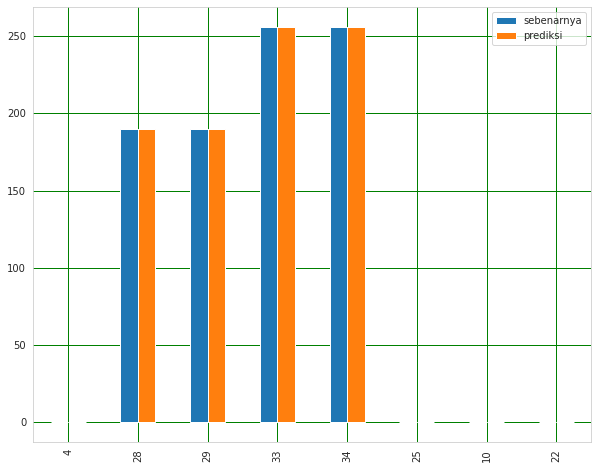

In [32]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()


In [33]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmse)
print("R^2 Value: \n", r2_value)

Intercept: 
 -2.1316282072803006e-13
Root Mean Square Error 
 0.051782900505499975
R^2 Value: 
 0.9999997933636091
